## Práctica DB-Cluster

### Iván López de Munain Quintana

In [1]:
import numpy as np

dist = np.array([
    [0, 1, 3, 4, 7],
    [1,0, 4, 4, 8],
    [3,4,0, 2, 8],
    [4,4,2,0, 7],
    [7,8,8,7,0]
])

n=dist.shape[0]

heter12 = 1/(2*4)
heter345 = (2**2+8**2+7**2)/(2*9)
print("{12}:", 2*heter12,", {345}:", 3*heter345)

heter13 = 3**2/(2*4)
heter245 = (4**2+8**2+7**2)/(2*9)
print("{13}:",2*heter13,", {245}:",3*heter245)

heter14 = 4**2/(2*4)
heter235 = (4**2+8**2+8**2)/(2*9)
print("{14}:",2*heter14,", {235}:",3*heter235)

heter15 = 7**2/(2*4)
heter234 = (4**2+4**2+2**2)/(2*9)
print("{15}",2*heter15,", {234}:",3*heter234)

heter23 = 4**2/(2*4)
heter145 = (4**2+7**2+7**2)/(2*9)
print("{23}",2*heter23,", {145}:",3*heter145)

heter24 = 4**2/(2*4)
heter135 = (3**2+7**2+8**2)/(2*9)
print("{24}",2*heter24,", {135}:",3*heter135)

heter25 = 7**2/(2*4)
heter134 = (3**2+4**2+2**2)/(2*9)
print("{25}",2*heter25,", {134}:",3*heter134)

heter34 = 2**2/(2*4)
heter125 = (1**2+7**2+8**2)/(2*9)
print("{34}",2*heter34,", {125}:",3*heter125)

heter35 = 8**2/(2*4)
heter124 = (1**2+4**2+4**2)/(2*9)
print("{35}",2*heter35,", {124}:",3*heter124)

heter45 = 7**2/(2*4)
heter123 = (1**2+3**2+4**2)/(2*9)
print("{45}",2*heter45,", {123}:",3*heter123)

heter1 = 0
heter2345 = (4**4+4**4+8**2+2**2+8**2+7**2)/(2*16)
print(" {1}",heter1,", {2345}:  ",4*heter2345)

heter2 = 0
heter1345 = (3**2+4**2+7**2+2**2+8**2+7**2)/(2*16)
print(" {2}",heter2,", {1345}:    ",4*heter1345)

heter3 = 0
heter1245 = (1**2+4**2+7**2+4**2+8**2+7**2)/(2*16)
print(" {3}",heter3," , {1245}:   ",4*heter1245)

heter4 = 0
heter1235 = (1**2+3**2+7**2+4**2+8**2+8**2)/(2*16)
print(" {4}",heter4," , {1235}:   ",4*heter1235)

heter5 = 0
heter1234 = (1**2+3**2+4**2+4**2+4**2+2**2)/(2*16)
print(" {5}",heter5," , {1234}:   ",4*heter1234)


{12}: 0.25 , {345}: 19.5
{13}: 2.25 , {245}: 21.5
{14}: 4.0 , {235}: 24.0
{15} 12.25 , {234}: 6.0
{23} 4.0 , {145}: 19.0
{24} 4.0 , {135}: 20.333333333333332
{25} 12.25 , {134}: 4.833333333333334
{34} 1.0 , {125}: 19.0
{35} 16.0 , {124}: 5.5
{45} 12.25 , {123}: 4.333333333333333
 {1} 0 , {2345}:   86.625
 {2} 0 , {1345}:     23.875
 {3} 0  , {1245}:    24.375
 {4} 0  , {1235}:    25.375
 {5} 0  , {1234}:    7.75


Con estos resultados (para obtener la heterogeneidad total hay que sumar por filas) vemos cómo la menor heterogeneidad se obtiene al hacer un cluster con la muestra 5 y otro cluster formado por las muestras 1,2, 3 y 4(heterogeneidad=7.75).

In [3]:
heter1_234 =  3 * heter234
print("{1}{234}",heter1_234)
heter2_134 = 3 * heter134
print("{134}{2}",heter2_134)
heter3_124 =  3 * heter124
print("{3}{124}",heter3_124)
heter4_123 =  3 * heter123
print("{4}{123}",heter4_123)
heter12_34= 2*heter12+ 2*heter34
print("{12}{34}", heter12_34)
heter13_24= 2*heter13+2*heter24
print("{13}{24}", heter13_24)
heter14_23=2*heter14+2*heter23
print("{14}{23}", heter14_23)

{1}{234} 6.0
{134}{2} 4.833333333333334
{3}{124} 5.5
{4}{123} 4.333333333333333
{12}{34} 1.25
{13}{24} 6.25
{14}{23} 8.0


El más pequeño es el cluster formado por 1 y 2, y otro cluster formado por 3 y 4 (heterogeneidad de 1.25).

In [7]:
print(heter12)
print(heter34)

0.125
0.5


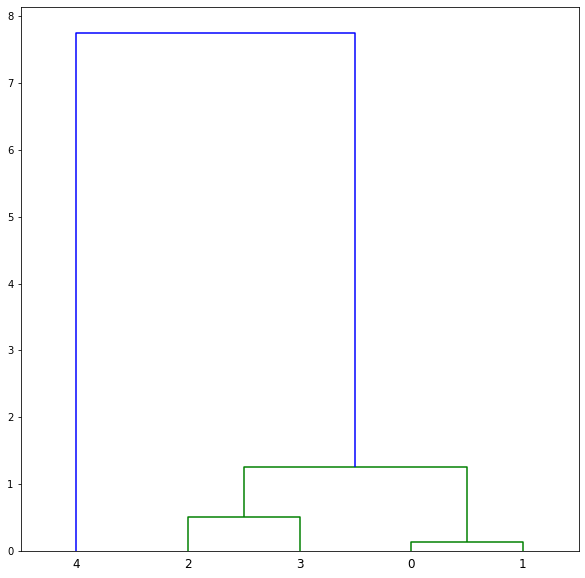

In [9]:
#Dendograma
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

linkage= np.array([
    [2,3,0.5,2],
    [0,1,0.125,2],
    [5,6,1.25,3],
    [4,7,7.75,5]
], dtype="float")

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(linkage)
plt.show()

### Selección inicial de centros

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import mode
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from math import floor

iris= load_iris()
y=iris.target
x=iris.data[:,:2]

#x = minmax_scale(x)
#normalizar
normalizar = StandardScaler()
x= normalizar.fit_transform(iris.data)

kmedias = KMeans(n_clusters=15).fit(x)
etiquetas = kmedias.labels_
centroids = kmedias.cluster_centers_
prediction=kmedias.predict(x)

clusteringWard = AgglomerativeClustering(n_clusters=6, linkage="ward")
clusteringWard.fit(centroids)

etiq = clusteringWard.labels_
finalPred = -1*np.ones(prediction.shape[0],dtype='int')

for i in range(prediction.shape[0]):
    finalPred[i]= etiq[prediction[i]]
    

modaWard= -1*np.ones(6,dtype='float')
for j in range(0,6):
    modaWard[j] = mode(y[np.argwhere(finalPred == j)])[0].astype('int')

yPredictWard = modaWard[finalPred]

aciertosWard = 0

for i in range(len(y)):
    if yPredictWard[i]==y[i]:
        aciertosWard+=1

print("\nAglomerativo Ward con selección de centros:\n")
print("Tasa de aciertos con seleccion incial de centros: ", round(aciertosWard/len(y),3), "%")


[2 0 2 1 0 4 1 2 5 2 0 3 4 1 0]

Aglomerativo Ward con selección de centros:

Tasa de aciertos con seleccion incial de centros:  0.84 %


### DBSCAN Iris

In [23]:
from sklearn.cluster import DBSCAN

#hacer holdout
clustering = DBSCAN(eps=0.25, min_samples=2).fit(x)
print(clustering.labels_)


[ 0  1  1  1  2  3 -1  0  4  1  5  0  1  4 -1 -1  3  0 -1  6 -1 -1 -1 -1
  0  1 -1  0  0  1  1 -1 -1 -1  1 -1 -1  2  4  0  0 -1  1 -1 -1  1  6  1
  5  0 -1 -1 -1 -1 -1  7 -1 -1 -1 -1 -1 -1 -1  8 -1  9 10 -1 -1 -1 -1 -1
 -1 -1 11 -1 -1 -1  8 -1 12 12 13 -1 10 -1  9 -1 14 -1 -1  8 13 -1 -1 14
  7 11 -1  7 -1 15 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 16 -1 -1 -1 -1 -1 -1 17 18 -1 -1 -1 18 -1 -1 -1 19 -1 17 -1 -1 -1 15 16
 -1 -1 -1 -1 19 17]
